## Cognifyz Technologies – Data Science Internship  
**Name:** Kousik Chakraborty  
**Domain:** Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

This notebook includes Level 1 and Level 2 as required.
Level 3 Task 1 is added as additional analysis.

# Level 1

## Task 1: Data Exploration and Preprocessing
**Objective:**  
To understand the dataset structure, handle missing values, and analyze the target variable.

In [2]:
df=pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.shape

(9551, 21)

In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df=df.dropna(subset=["Cuisines"])

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

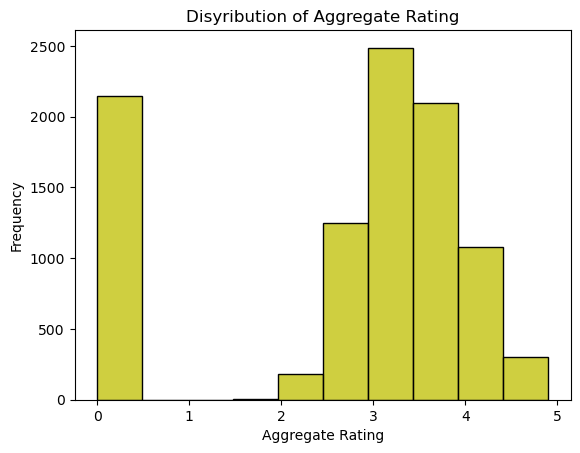

In [8]:
sns.histplot(df["Aggregate rating"],bins=10,color="y")
plt.title("Disyribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

**Insights:**  
- The dataset contains a large number of restaurant records with multiple features.  
- Only a few missing values were found in the *Cuisines* column and were removed.  
- Aggregate rating is a numerical value and is used as the target variable.

#### Task 2: Descriptive Analysis

**Objective:**  
To compute statistical measures for numerical features and analyze the
distribution of categorical variables.

In [9]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [10]:
df["Country Code"].value_counts().head()

Country Code
1      8652
216     425
215      80
30       60
214      60
Name: count, dtype: int64

In [11]:
df["City"].value_counts().head()

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

In [12]:
df["Cuisines"].value_counts().head()

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

In [13]:
df["City"].value_counts().head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64

In [14]:
df["Cuisines"].value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

**Insights:**  
- Restaurants are not evenly distributed across cities and countries.  
- Some cities have a much higher number of restaurants compared to others.  
- A few cuisines are very common, showing popular food choices.

#### Task 3: Geospatial Analysis

**Objective:**  
To visualize restaurant locations using geographical coordinates and analyze
the distribution of restaurants across different cities and countries.

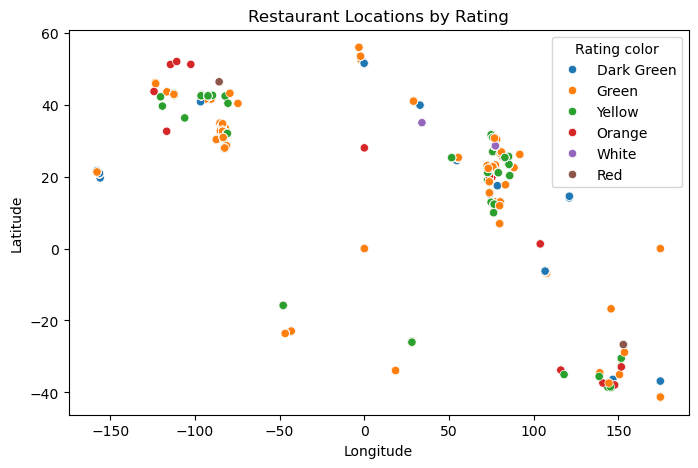

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Longitude",y="Latitude",data=df,hue="Rating color")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Locations by Rating")
plt.show()

In [16]:
df[["Longitude","Latitude","Aggregate rating"]].corr()

,Longitude,Latitude,Aggregate rating
Longitude,1.000000,0.045415,-0.114733
Latitude,0.045415,1.000000,0.000197
Aggregate rating,-0.114733,0.000197,1.000000


**Insights:**  
- Most restaurants are located in specific city areas rather than being evenly spread.  
- Restaurants are mainly concentrated in urban regions.  
- The location of a restaurant does not strongly affect its aggregate rating.

# Level 2

#### Task 1: Table Booking and Online Delivery

**Objective:**  
To analyze the availability of table booking and online delivery services
and compare their impact on restaurant ratings and price ranges.

In [17]:
table_booking_percentage=df["Has Table booking"].value_counts(normalize=True)*100
print(table_booking_percentage)

Has Table booking
No     87.864179
Yes    12.135821
Name: proportion, dtype: float64


In [18]:
online_delivery_percentage=df["Has Online delivery"].value_counts(normalize=True)*100
print(online_delivery_percentage)

Has Online delivery
No     74.313561
Yes    25.686439
Name: proportion, dtype: float64


In [19]:
df.groupby("Has Table booking")["Aggregate rating"].mean()

Has Table booking
No     2.557956
Yes    3.441969
Name: Aggregate rating, dtype: float64

In [20]:
df.groupby("Price range")["Has Online delivery"].value_counts(normalize=True)*100

Price range  Has Online delivery
1            No                     84.204597
             Yes                    15.795403
2            No                     58.689367
             Yes                    41.310633
3            No                     70.747331
             Yes                    29.252669
4            No                     90.955631
             Yes                     9.044369
Name: proportion, dtype: float64

**Insights:**  
- Only some restaurants provide table booking and online delivery facilities.  
- Restaurants with table booking usually have slightly better ratings.  
- Online delivery is more common in certain price ranges than others.

#### Task 2: Price Range Analysis

**Objective:**  
To find the most common price range, compare average ratings across price ranges,
and identify the rating color with the highest average rating.

In [21]:
df["Price range"].value_counts()

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64

In [22]:
df.groupby("Price range")["Aggregate rating"].mean()

Price range
1    1.997476
2    2.941054
3    3.682633
4    3.817918
Name: Aggregate rating, dtype: float64

In [23]:
df.groupby("Rating color")["Aggregate rating"].mean().sort_values(ascending=False)

Rating color
Dark Green    4.659667
Green         4.167904
Yellow        3.683063
Orange        3.051339
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64

**Insights:**  
- Most restaurants belong to a limited number of price ranges.  
- Restaurants in higher price ranges generally have better average ratings.  
- Certain rating colors represent higher-rated restaurants.

#### Task 3: Feature Engineering

**Objective:**  
To create new useful features from existing columns and encode categorical
variables to make the dataset more meaningful for analysis.

In [24]:
df["Restaurants_name_length"]=df["Restaurant Name"].str.len()
df[["Restaurant Name","Restaurants_name_length"]].head()

,Restaurant Name,Restaurants_name_length
0,Le Petit Souffle,16
1,Izakaya Kikufuji,16
2,Heat - Edsa Shangri-La,22
3,Ooma,4
4,Sambo Kojin,11


In [25]:
df["Address_length"]=df["Address"].str.len()
df[["Address","Address_length"]].head()

,Address,Address_length
0,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


In [26]:
df["Has Table booking"].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
df["Has_Table_Booking"]=df["Has Table booking"].replace({"Yes":1,"No":0})
df[["Has Table booking","Has_Table_Booking"]].head()

,Has Table booking,Has_Table_Booking
0,Yes,1
1,Yes,1
2,Yes,1
3,No,0
4,Yes,1


In [28]:
df["Has_Online_Delivery"]=df["Has Online delivery"].replace({"Yes":1,"No":0})
df[["Has Online delivery","Has_Online_Delivery"]].head()

,Has Online delivery,Has_Online_Delivery
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0


In [29]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurants_name_length,Address_length,Has_Table_Booking,Has_Online_Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


**Insights:**  
- New columns were created from existing data.  
- Table booking and online delivery were converted into numeric values.  
- These features make the dataset easier to analyze.

## Level 3

#### Task 1: Predictive Modeling

**Objective:**  
To build regression models to predict the aggregate rating of restaurants
using available features and compare their performance.

In [30]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Restaurants_name_length', 'Address_length',
       'Has_Table_Booking', 'Has_Online_Delivery'],
      dtype='object')

In [31]:
x=df[["Price range","Votes","Has_Table_Booking","Has_Online_Delivery"]]
y=df["Aggregate rating"]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
lin=LinearRegression()
lin.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_pred_lin=lin.predict(x_test)

In [35]:
mae_lin=mean_absolute_error(y_test,y_pred_lin)
print("Mean Absolute Error: ",mae_lin)

Mean Absolute Error:  1.0496312919206845


In [36]:
r2_lin=r2_score(y_test,y_pred_lin)
print("r2 Score: ",r2_lin)

r2 Score:  0.28918149206999977


In [37]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [38]:
y_pred_dt=dt.predict(x_test)

In [39]:
mae_dt=mean_absolute_error(y_test,y_pred_dt)
print("Mean Absolute Error: ",mae_dt)

Mean Absolute Error:  0.27955660674957505


In [40]:
r2_dt=r2_score(y_test,y_pred_dt)
print("r2 Score: ",r2_dt)

r2 Score:  0.9184757348376379


In [41]:
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_pred_rf=rf.predict(x_test)

In [43]:
mae_rf=mean_absolute_error(y_test,y_pred_rf)
print("Mean Absolute Error: ",mae_rf)

Mean Absolute Error:  0.2556431505348661


In [44]:
r2_rf=r2_score(y_test,y_pred_rf)
print("r2 Score: ",r2_rf)

r2 Score:  0.9333611884146741


### Insights

- Random Forest gives the best performance among all models.
- Lowest MAE shows predictions are very close to actual ratings.
- High R² value indicates the model explains most of the data variation.